In [468]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve, f1_score, plot_confusion_matrix

In [469]:
filename = "heart_statlog_cleveland_hungary_final.csv"
df = pd.read_csv(filename)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [470]:
colors_class = ["#D7E8FF", "#EF2D1B"]
colors_gender = ["#F5BCFA", "#AEEAF5"]
colors_fbs = ["#ff0000", "#00ff00"]

In [471]:
def get_col_value_counts(pandaSeries, category_dict):
    count = pandaSeries.value_counts(sort=False)

    for cat_key in category_dict.keys():
        count[category_dict[cat_key]] = count.pop(cat_key)

    values = [v for v in count]
    labels = count.keys()
    return values, labels

In [472]:
def build_barh(pandasSeries, catDict, title=""):
    values, labels = get_col_value_counts(pandasSeries, catDict)
    ymin = min(catDict.keys())
    ymax=max(catDict.keys())+1
    y_coord = range(ymin,ymax)
    plt.title(title)
    plt.barh(y=y_coord, width=values, tick_label=labels)

In [473]:
def build_pie(pandaSeries, catDict, title="", colors=colors_class):
    values, labels = get_col_value_counts(pandaSeries, catDict)
    plt.pie(values,labels=labels,autopct='%1.1f%%', colors=colors)
    plt.title(title)
    plt.axis('equal')

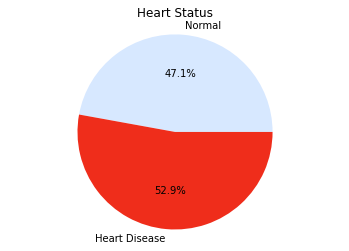

In [474]:
category_dict = {0: "Normal", 
                 1: "Heart Disease"}
build_pie(df["target"], category_dict, title="Heart Status")
plt.show()

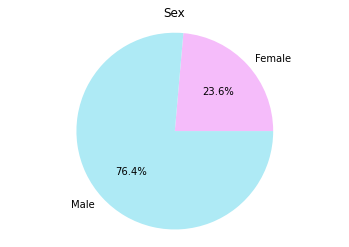

In [475]:
gender_dict = {0: "Female", 
                 1: "Male"}

build_pie(df["sex"], gender_dict, title="Sex", colors=colors_gender)

plt.show()

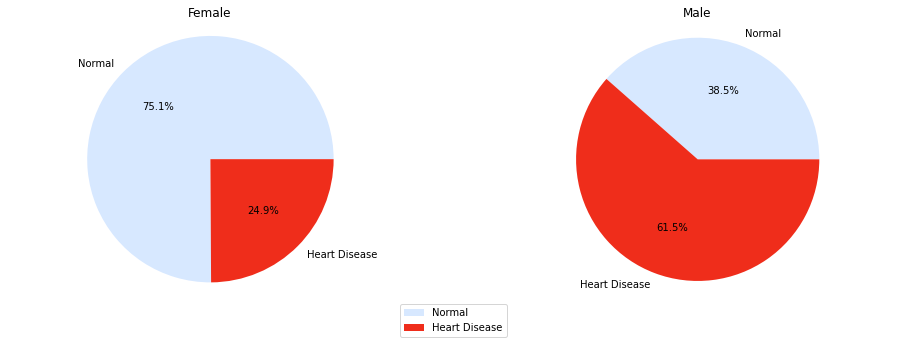

In [476]:
female_df = df[df["sex"] == 0]
male_df = df[df["sex"] == 1]

category_dict = {0: "Normal", 
                 1: "Heart Disease"}

_, labels = get_col_value_counts(female_df["target"], category_dict)

fig = plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
build_pie(female_df["target"], category_dict, title="Female")

plt.subplot(1,2,2)
build_pie(male_df["target"], category_dict, title="Male")

fig.legend(labels=labels, loc=8)

plt.show()

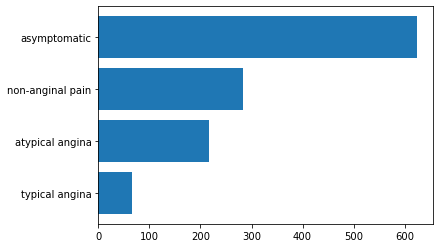

In [477]:
pain_dict = {1: "typical angina",
                2: "atypical angina",
                3: "non-anginal pain",
                4: "asymptomatic"}

build_barh(df["chest pain type"], pain_dict)

plt.show()

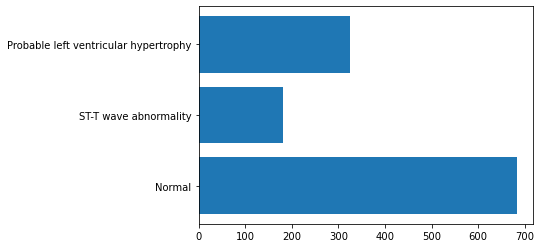

In [478]:
ecg_dict = {0: "Normal",
                1: "ST-T wave abnormality",
                2: "Probable left ventricular hypertrophy"}

build_barh(df["resting ecg"], ecg_dict)

plt.show()

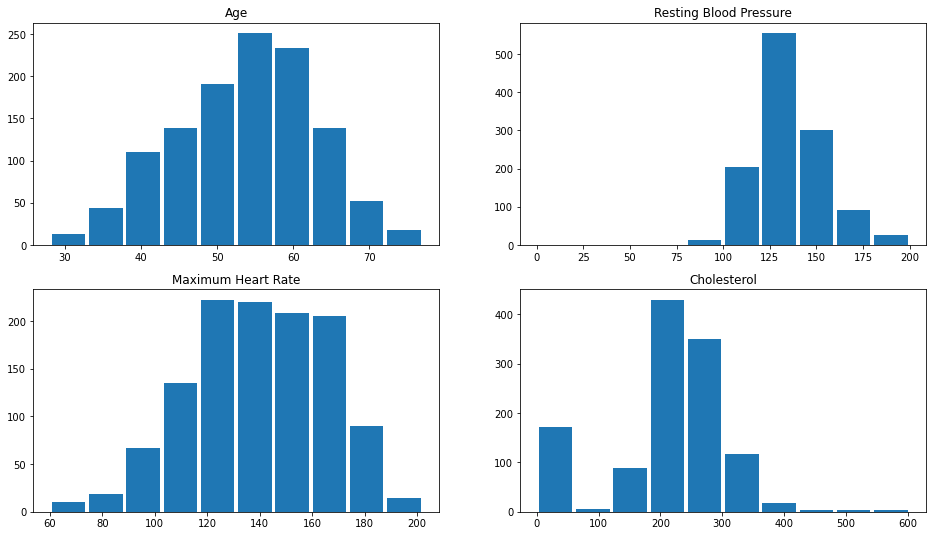

In [479]:
plt.figure(figsize=(16,9))

plt.subplot(221)
plt.hist(df["age"], rwidth=0.9)
plt.title("Age")

plt.subplot(222)
plt.hist(df["resting bp s"], rwidth=0.9)
plt.title("Resting Blood Pressure")

plt.subplot(223)
plt.hist(df["max heart rate"], rwidth=0.9)
plt.title("Maximum Heart Rate")

plt.subplot(224)
plt.hist(df["cholesterol"], rwidth=0.9)
plt.title("Cholesterol")

plt.show()

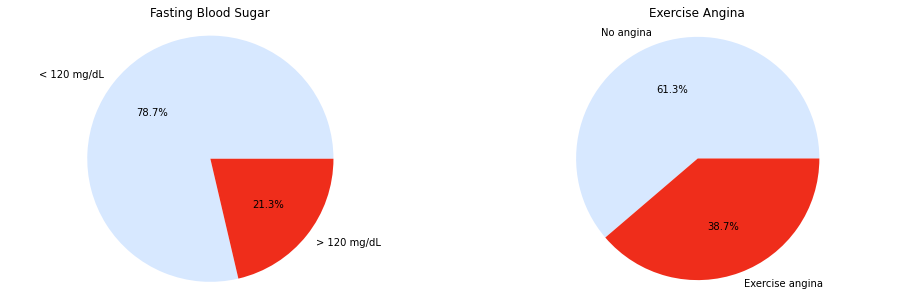

In [480]:
plt.figure(figsize=(16,5))

sugar_dict = {0: "< 120 mg/dL", 
                 1: "> 120 mg/dL"}
plt.subplot(121)
build_pie(df["fasting blood sugar"], sugar_dict, title="Fasting Blood Sugar")

exercise_dict = {0: "No angina", 
                 1: "Exercise angina"}
plt.subplot(122)
build_pie(df["exercise angina"], exercise_dict, title="Exercise Angina")

plt.show()

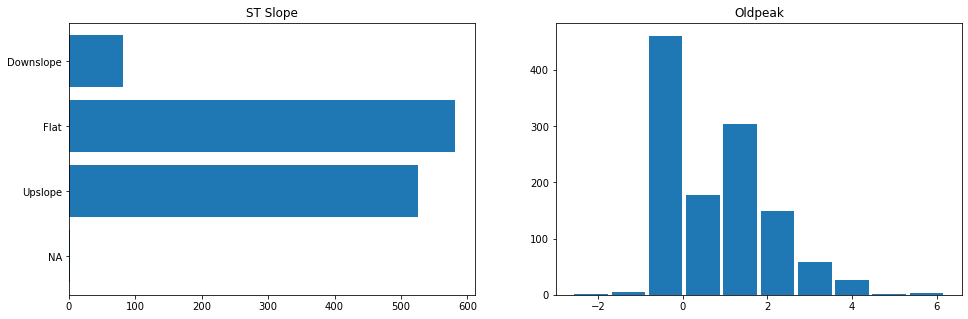

In [481]:
plt.figure(figsize=(16,5))

slope_dict = {0: "NA",
                1: "Upslope",
                2: "Flat",
                3: "Downslope"}

plt.subplot(121)
build_barh(df["ST slope"], slope_dict, title="ST Slope")

plt.subplot(122)
plt.hist(df["oldpeak"], rwidth=0.9)
plt.title("Oldpeak")

plt.show()

# Predicting Heart Disease

## Preparing data

In [482]:
features = df.drop("target", axis=1)

features["sex"].replace(gender_dict, inplace=True)
features["chest pain type"].replace(pain_dict, inplace=True)
features["fasting blood sugar"].replace(sugar_dict, inplace=True)
features["resting ecg"].replace(ecg_dict, inplace=True)
features["exercise angina"].replace(exercise_dict, inplace=True)
features["ST slope"].replace(slope_dict, inplace=True)

display(df.head())
display(features.head())

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,Male,atypical angina,140,289,< 120 mg/dL,Normal,172,No angina,0.0,Upslope
1,49,Female,non-anginal pain,160,180,< 120 mg/dL,Normal,156,No angina,1.0,Flat
2,37,Male,atypical angina,130,283,< 120 mg/dL,ST-T wave abnormality,98,No angina,0.0,Upslope
3,48,Female,asymptomatic,138,214,< 120 mg/dL,Normal,108,Exercise angina,1.5,Flat
4,54,Male,non-anginal pain,150,195,< 120 mg/dL,Normal,122,No angina,0.0,Upslope


In [483]:
features = pd.get_dummies(features)

features.head()

,age,resting bp s,cholesterol,max heart rate,oldpeak,sex_Female,sex_Male,chest pain type_asymptomatic,chest pain type_atypical angina,chest pain type_non-anginal pain,...,fasting blood sugar_> 120 mg/dL,resting ecg_Normal,resting ecg_Probable left ventricular hypertrophy,resting ecg_ST-T wave abnormality,exercise angina_Exercise angina,exercise angina_No angina,ST slope_Downslope,ST slope_Flat,ST slope_NA,ST slope_Upslope
0,40,140,289,172,0.0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,37,130,283,98,0.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,48,138,214,108,1.5,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,54,150,195,122,0.0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [484]:
targets = np.array(df["target"])
feature_list = list(features.columns)
features = np.array(features)

In [485]:
train_features, test_features, train_labels, test_labels = train_test_split(features, targets, test_size=0.3)

## Random Forest

In [486]:
rf = RandomForestRegressor(n_estimators=10000)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=10000)

In [487]:
score = rf.predict(test_features)
ap = average_precision_score(test_labels, score)
ap = ap*100
print("Average precision: %0.2f%%" % ap)

Average precision: 93.78%


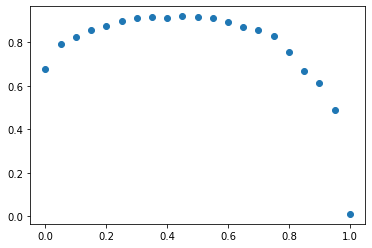

Maximum F1-score is 0.92 at a threshold level of 0.45


In [488]:
threshold = []
f1 = []
for t in range(0, 105, 5):
    results = [1 if s >= (t/100) else 0 for s in score]
    threshold.append(t/100)
    f1.append(f1_score(test_labels, results))
    
plt.scatter(threshold, f1)
plt.show()

opt_threshold = threshold[f1.index(max(f1))]
print("Maximum F1-score is %0.2f at a threshold level of %0.2f" % (max(f1), opt_threshold))

results = [1 if s >= opt_threshold else 0 for s in score]

## SVM

In [489]:
kernel_list = ["linear", "poly", "rbf", "sigmoid"]
max_degree = 10

for kernel in kernel_list:
    svm_clf = svm.SVC(kernel=kernel)
    svm_clf = svm.SVC(kernel=kernel)
    svm_clf.fit(train_features, train_labels)
    pred = svm_clf.predict(test_features)
    print("Using %s kernel,\n\tF1-score: %0.2f" % (kernel,f1_score(test_labels, pred)))

    ap = average_precision_score(test_labels, pred)
    ap = ap*100
    print("\tAverage precision: %0.2f%%" % ap)

Using linear kernel,
	F1-score: 0.87
	Average precision: 82.89%
Using poly kernel,
	F1-score: 0.72
	Average precision: 64.00%
Using rbf kernel,
	F1-score: 0.72
	Average precision: 66.03%
Using sigmoid kernel,
	F1-score: 0.53
	Average precision: 50.69%


## Neural Network

In [492]:
mlp_clf = MLPClassifier(solver="sgd", alpha=1e-5, hidden_layer_sizes=(1000,900))
mlp_clf.fit(train_features, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1000, 900), solver='sgd')

In [493]:
mlp_pred = mlp_clf.predict(test_features)

print("F1-score: %0.2f" % f1_score(test_labels, mlp_pred))
#print("\tAverage precision: %0.2f%%" % average_precision_score(test_labels, mlp_pred)*100)

F1-score: 0.74
